**姓名：周鹏程**

**学号：23317244**

**作业简介：通过stata代码对“nlsw88.dta”进行相关数据处理及分析**

In [1]:
sysuse nlsw88.dta, clear


Running /Applications/Stata/profile.do ...
command window is unrecognized
r(199);


(NLSW, 1988 extract)


## 任务1：描述性分析

In [2]:
asdoc tabstat age grade wage hours ttl_exp tenure, stats(mean sd median min max) columns(statistics) save(Table01.docx) replace


             |      Mean         SD        p50        Min        Max 
-------------+------------------------------------------------------
         age |  39.15316   3.060002         39         34         46 
       grade |  13.09893   2.521246         12          0         18 
        wage |  7.766949   5.755523    6.27227   1.004952   40.74659 
       hours |  37.21811   10.50914         40          1         80 
     ttl_exp |  12.53498   4.610208     13.125   .1153846   28.88461 
      tenure |   5.97785   5.510331   3.833333          0   25.91667 
(file Table01.docx not found)
Click to Open File:  Table01.docx
(file Table01.docx not found)
Click to Open File:  Table01.docx


## 任务2：生成变量

In [3]:
// age2 : 该变量的所有观察值等于 age 变量中相应观察值的平方
gen age2 = age^2

// ln_wage : 工资变量的自然对数
gen ln_wage = ln(wage)

// wage_hour: 工资变量 wage 与小时 hours 的比值
gen wage_hour = wage/hours

// dum : 1=工资大于平均工资，0=工资小于等于平均工资
sum wage
gen dum = wage > r(mean)

(4 missing values generated)

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        wage |      2,246    7.766949    5.755523   1.004952   40.74659


## 任务3：绘图

(bin=29, start=.11538462, width=1)
file His_ttl.png written in PNG format
file His_ttl.png written in PNG format


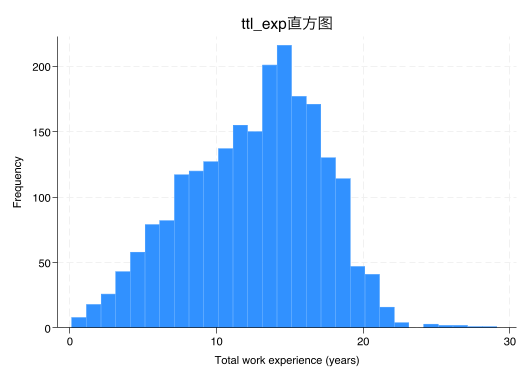

In [4]:
// 绘制ttl_exp直方图并保存
histogram ttl_exp, width(1) frequency title("ttl_exp直方图")
graph export His_ttl.png, replace

file Kendi_ttl.png written in PNG format


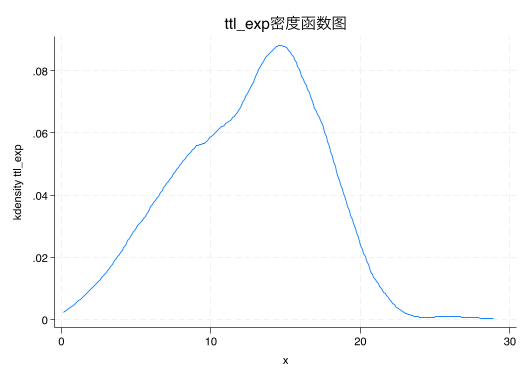

In [5]:
// 绘制ttl_exp密度函数图并保存
twoway kdensity ttl_exp, title("ttl_exp密度函数图")
graph export Kendi_ttl.png, replace

indlbl:
           1 Ag/Forestry/Fisheries
           2 Mining
           3 Construction
           4 Manufacturing
           5 Transport/Comm/Utility
           6 Wholesale/Retail trade
           7 Finance/Ins/Real estate
           8 Business/Repair svc
           9 Personal services
          10 Entertainment/Rec svc
          11 Professional services
          12 Public administration


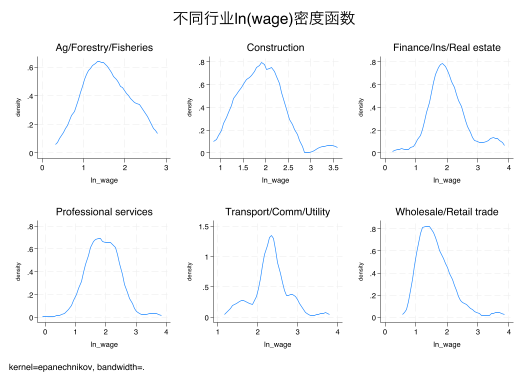

In [6]:
// 分行业绘制ln(wage)密度函数
label list indlbl

mkdensity ln_wage if inlist(industry,1,3,5,6,7,11), by(industry)  title("不同行业ln(wage)密度函数")

### 结果解释：
- ttl_exp变量的直方图展示了总工作经验的分布情况。大部分样本集中在较低经验区间，分布右偏。
- ttl_exp变量的密度函数图进一步反映了其分布的连续形态。
- ln(wage)的密度图展示了industry为1,3,5,6,7,11时，ln(wage)的分布差异。不同产业的工资分布形态和峰度不同，便于比较行业间收入结构。

## 任务4：对industry进行分析

每个行业的观察值个数

In [7]:

tabulate industry



               Industry |      Freq.     Percent        Cum.
------------------------+-----------------------------------
  Ag/Forestry/Fisheries |         17        0.76        0.76
                 Mining |          4        0.18        0.94
           Construction |         29        1.30        2.24
          Manufacturing |        367       16.44       18.68
 Transport/Comm/Utility |         90        4.03       22.72
 Wholesale/Retail trade |        333       14.92       37.63
Finance/Ins/Real estate |        192        8.60       46.24
    Business/Repair svc |         86        3.85       50.09
      Personal services |         97        4.35       54.44
  Entertainment/Rec svc |         17        0.76       55.20
  Professional services |        824       36.92       92.11
  Public administration |        176        7.89      100.00
------------------------+-----------------------------------
                  Total |      2,232      100.00


各个行业妇女的平均工资(wage)、平均工作时数(hours)、平均年龄(age)

In [8]:
tabstat wage hours age, by(industry) stats(mean) columns(statistics)


Summary for variables: wage hours age
Group variable: industry (Industry)

        industry |      Mean
-----------------+----------
Ag/Forestry/Fish |  5.621121
                 |  34.47059
                 |  39.94118
-----------------+----------
          Mining |  15.34959
                 |        40
                 |     37.25
-----------------+----------
    Construction |  7.564934
                 |  35.65517
                 |  38.62069
-----------------+----------
   Manufacturing |  7.501578
                 |  40.89373
                 |   38.9891
-----------------+----------
Transport/Comm/U |  11.44335
                 |  39.85556
                 |  39.27778
-----------------+----------
Wholesale/Retail |  6.125897
                 |  35.24699
                 |  39.28829
-----------------+----------
Finance/Ins/Real |  9.843174
                 |  38.51563
                 |  38.82813
-----------------+----------
Business/Repair  |   7.51579
                 |  33.15

列表统计不同行业中白种人、黑种人和其他人种的比例

In [9]:
tabulate industry race, col


+-------------------+
| Key               |
|-------------------|
|     frequency     |
| column percentage |
+-------------------+

                      |               Race
             Industry |     White      Black      Other |     Total
----------------------+---------------------------------+----------
Ag/Forestry/Fisheries |        13          4          0 |        17 
                      |      0.80       0.69       0.00 |      0.76 
----------------------+---------------------------------+----------
               Mining |         4          0          0 |         4 
                      |      0.25       0.00       0.00 |      0.18 
----------------------+---------------------------------+----------
         Construction |        24          4          1 |        29 
                      |      1.48       0.69       3.85 |      1.30 
----------------------+---------------------------------+----------
        Manufacturing |       229        134          4 |       367 


## 任务5：race变量定义

In [10]:
label define racelbl 1 "白种人" 2 "黑种人" 3 "其它"

label values race racelbl

label racelbl already defined
r(110);


## 任务6：续别变量转类别变量

In [ ]:
gen G_age = .

replace G_age = 1 if age <= 37
replace G_age = 2 if age > 37 & age <= 42
replace G_age = 3 if age > 42

label define Gagelbl 1 "37岁以下" 2 "38到42岁之间" 3 "43岁以上"
label values G_age Gagelbl

(2,246 missing values generated)
(795 real changes made)
(1,043 real changes made)
(408 real changes made)


## 任务7：工资分布

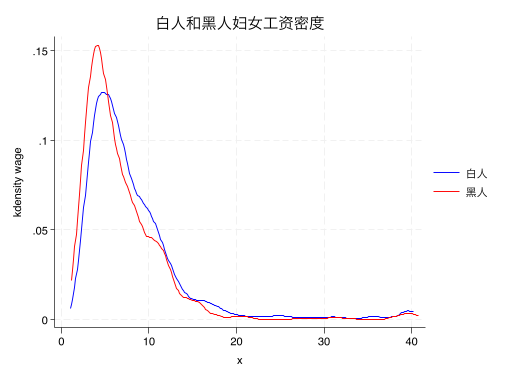

In [ ]:
// 白人和黑人妇女工资核密度图
twoway (kdensity wage if race==1, lcolor(blue)) (kdensity wage if race==2, lcolor(red)), legend(label(1 "白人") label(2 "黑人")) title("白人和黑人妇女工资密度")

### 结果解释
从核密度图可以看出，白人妇女的工资分布整体右移，峰值更高，说明白人妇女的工资水平普遍高于黑人妇女。黑人妇女的工资分布更集中在较低工资区间，且分布较为平缓，反映出种族间工资存在明显差异。两组分布的重叠部分较少，进一步说明工资分布的结构性差异。

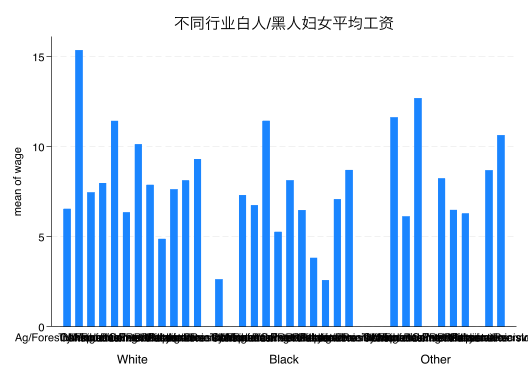

In [ ]:
// 白人和黑人妇女工资在不同行业的分布（柱状图）
graph bar (mean) wage, over(industry) over(race) legend(label(1 "白人") label(2 "黑人")) title("不同行业白人/黑人妇女平均工资")

### 结果解释
柱状图显示，在大多数行业中，白人妇女的平均工资均高于黑人妇女，且行业间工资差异也较为显著。部分行业（如制造业、服务业等）两者工资差距尤为明显。这表明种族和行业双重因素共同影响妇女的工资水平，提示在制定相关政策时需关注行业与种族的交互影响。

## 任务8：基本回归分析

In [ ]:
// 以第一个行业为基准组，回归各行业平均工资（ln_wage）
regress ln_wage i.industry

In [ ]:
// 计算各行业的平均工资预测值及置信区间
margins industry

In [ ]:
// 绘制各行业平均工资及置信区间
marginsplot, noci title("各行业平均工资及置信区间") ylabel(,angle(0))

In [13]:
gen black_ln_hours = (race==2)*ln(hours)
gen ln_hours = ln(hours)

// OLS回归
regress ln_wage ln_hours i.race black_ln_hours age age2 ttl_exp i.industry i.occupation

// 行业固定效应
areg ln_wage ln_hours i.race black_ln_hours age age2 ttl_exp i.occupation, absorb(industry)

// 行业+职业双固定效应
ssc install reghdfe, replace
reghdfe ln_wage ln_hours i.race black_ln_hours age age2 ttl_exp, absorb(industry occupation)


      Source |       SS           df       MS      Number of obs   =     2,224
-------------+----------------------------------   F(30, 2193)     =     40.13
       Model |  259.029756        30  8.63432519   Prob > F        =    0.0000
    Residual |  471.873576     2,193  .215172629   R-squared       =    0.3544
-------------+----------------------------------   Adj R-squared   =    0.3456
       Total |  730.903331     2,223  .328791422   Root MSE        =    .46387

------------------------------------------------------------------------------
     ln_wage | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
    ln_hours |   .0374525   .0256963     1.46   0.145    -.0129392    .0878442
             |
        race |
      Black  |  -.4040401   .2655195    -1.52   0.128    -.9247362    .1166559
      Other  |   .0353906   .0921232     0.38   0.701    -.1452672    .2160484
             |
black

### β1 和 β3 的经济含义简要解释
**计量模型**：
$$
\\ln(wage) = \alpha_0 + \alpha_1 + \beta_1 \ln(hours) + \beta_2 \text{Black} + \beta_3 (\text{Black} \times \ln(hours)) + \gamma \text{Controls} + u
$$

**β1（ln_hours的系数）**：
- 系数估计为 0.0374525 ，表示在引入行业及职业控制条件下，工作时长对于工资显著为正，即工时的增长能有效促进工资的提高。
- 在经济学意义上，表示在控制了行业、职业、年龄、工龄等因素等其他条件后，工时每增加1%时，工资的预期变化 0.0374525% 。

**β3（Black×ln_hours的交互项系数）**：
- 系数估计为 0.090179 ，表示在控制了行业、职业、年龄、工龄等因素等其他条件后,、对于黑人员工，工时的总效应为 0.090179 - 0.4040401 = -0.3138611 ，黑人女性工时对于工资显著为负，即黑人女性随着工时的增涨，其工资反而会降低。
- 经济学意义上，工时每增加 1% ，黑人员工工资较非黑人低 0.3138611%。
- 说明在其他条件相同下，女性员工工时对工资的影响上存在着显著的种族差异，且黑人遭受着一定程度职场歧视导致的工资降低。